<a href="https://colab.research.google.com/github/matheus-ramos-medeiros/ProjetoPlanoSaude/blob/main/Projeto_Plano_de_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Plano de Saúde




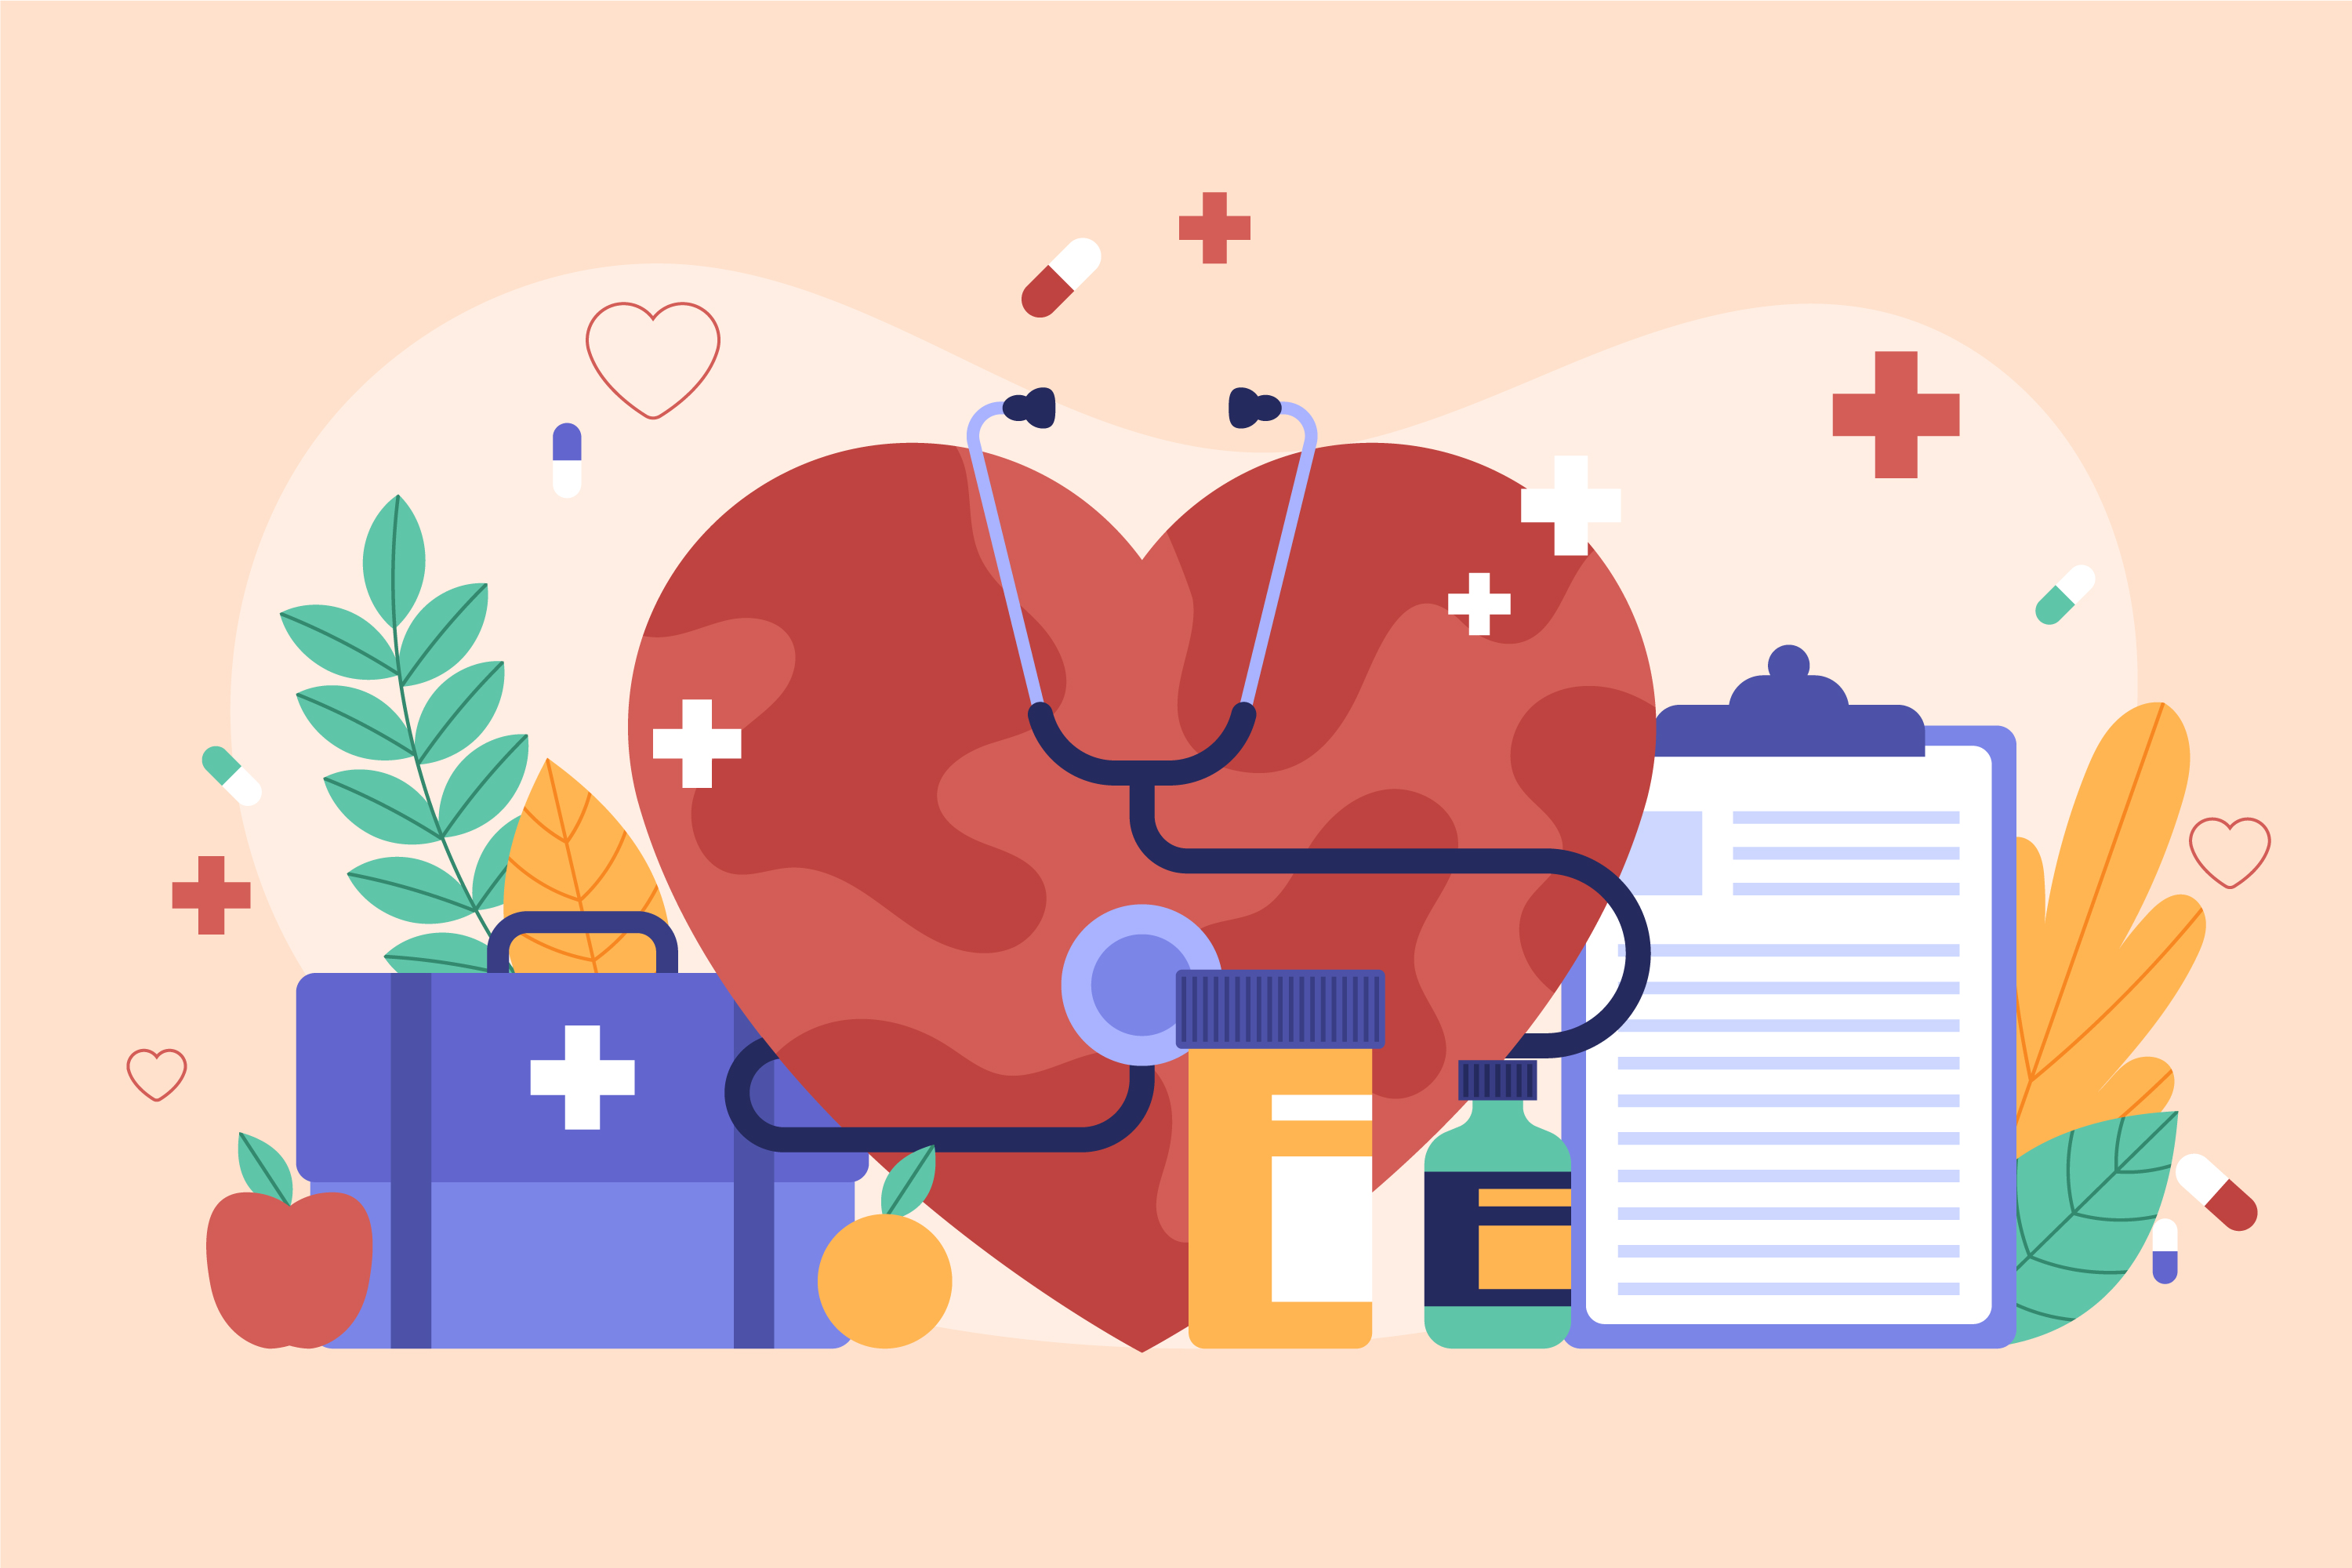

Nesse projeto, será abordado um caso em que uma empresa de plano de saúde está prestes a fechar um novo contrato com uma mineradora. No entanto, o time comercial e o de operações estão preocupados com o custo desse contrato, pois há o risco de gerar prejuízos financeiros para a empresa.

Um dos maiores desafios enfrentados pelas seguradoras de saúde é prever os custos médicos futuros dos seus clientes. A complexidade e a variabilidade dos fatores que influenciam os gastos com saúde tornam difícil determinar com precisão quanto um paciente vai gastar em tratamentos, exames e procedimentos. Essa incerteza pode ter um impacto significativo nos planos de saúde, já que eles precisam precificar seus serviços de forma competitiva, mas também garantir que tenham reservas financeiras suficientes para cobrir os custos médicos de seus clientes.

**Minha solução**:

Podemos treinar um modelo de Machine Learning com os **dados de diversos usuários da operadora** (Modelo de regressão) e tentar prever quanto será gasto com esse novo negócio.

Podemos submeter toda a **lista dos novos funcionários** e descobrir quanto cada um irá gastar ao longo do ano.
Assim somos preventivos e ajudamos a área de operações controlar o orçamento **( custo x receita )**

In [19]:
#importando os pacotes

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
#carregamento dos dados
df = pd.read_csv('/content/Base_Dados_Plano_Saude.csv')

#verificando o meu dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Descrição dos dados :
<ul>
  <li><strong>age:</strong> Idade do indivíduo em anos</li>
  <li><strong>sex:</strong> Sexo do indivíduo ('male' ou 'female')</li>
  <li><strong>bmi:</strong> Índice de massa corporal do indivíduo</li>
  <li><strong>children:</strong> Número de filhos dependentes do indivíduo</li>
  <li><strong>smoker:</strong> Indica se o indivíduo é fumante ('yes' ou 'no')</li>
  <li><strong>region:</strong> Região dos EUA em que o indivíduo reside ('northeast', 'southeast', 'southwest' ou 'northwest')</li>
  <li><strong>charges:</strong> Custo total de saúde cobrado pela seguradora para cada indivíduo no período de um ano.</li>
</ul>

In [3]:
#verificando as dimensões
df.shape

(1338, 7)

Temos 1.338 linhas e 7 colunas nessa base de dados.

In [4]:
#verificando o tipo de cada coluna
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#verificando mais informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Todos os tipos de coluna estão certos.

In [6]:
#dados nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

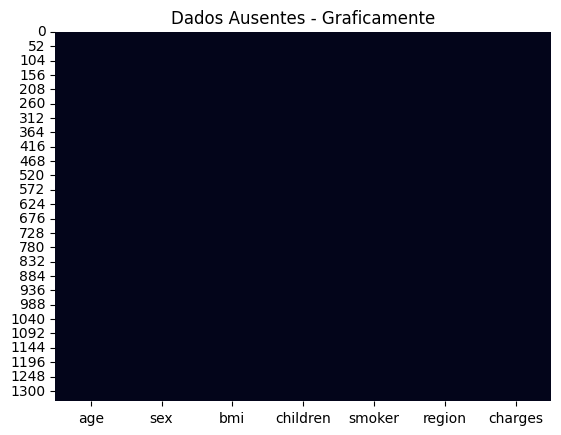

In [7]:
#dados nulos graficamente
nulos = df.isnull()
sns.heatmap(data = nulos , cbar = False)
plt.title("Dados Ausentes - Graficamente")
plt.show()

Verificamento que não temos nenhum dado nulo.

In [8]:
# estatistica dos dados

df.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Analisando a estatística descritiva do conjunto de dados, temos:

*   A idade média das pessoas no conjunto de dados é de aproximadamente 39 anos.
*   A média do índice de massa corporal (IMC) é de cerca de 30, o que é considerado obesidade.
*   A maioria das pessoas no conjunto de dados não é fumante.
*   Os custos médicos variam bastante no conjunto de dados, o desvio padrão é alto, o que sugere uma grande variabilidade nos gastos com saúde entre as pessoas.



## EDA (Análise Exploratória)

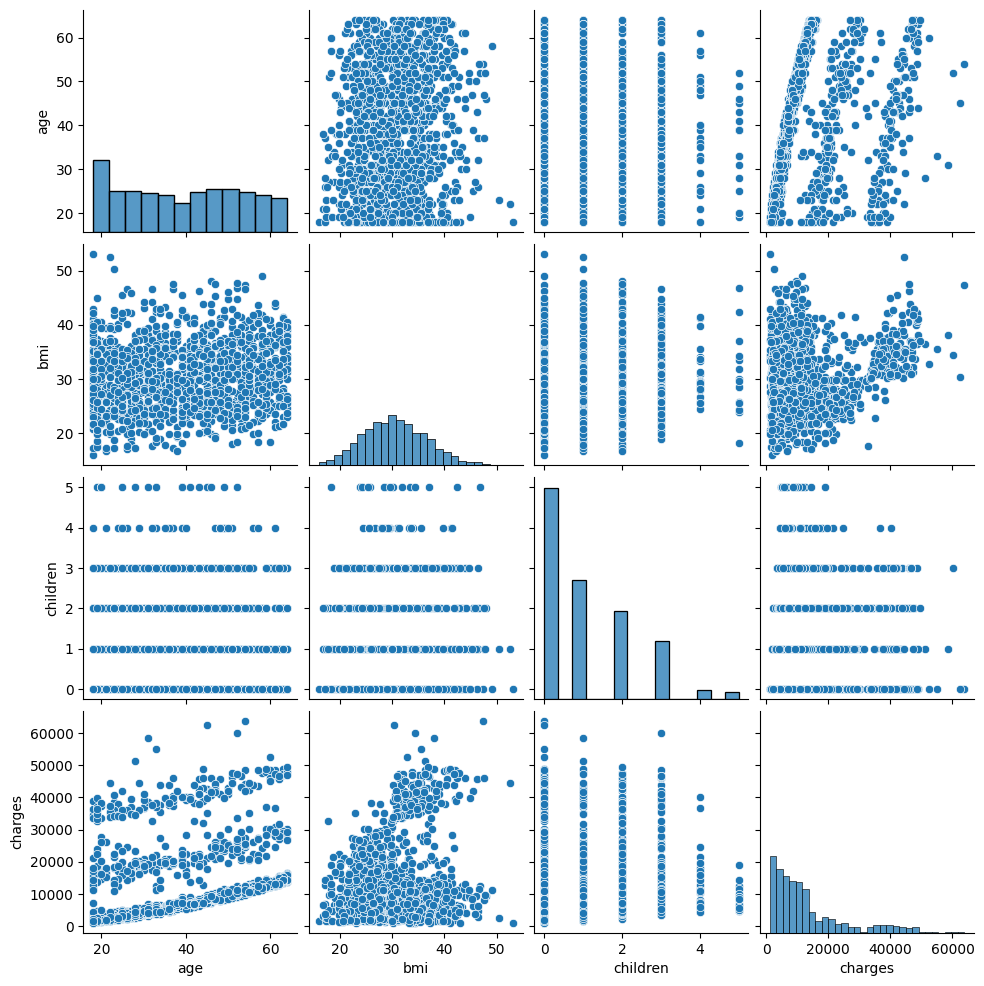

In [9]:
sns.pairplot(df);

Analisando vemos algumas tendencias como maior a idade, maior o gasto e olhando o histograma dos preços eles estão concentrados abaixo de 20.000 e temos outliers.

### Analisando a Idade

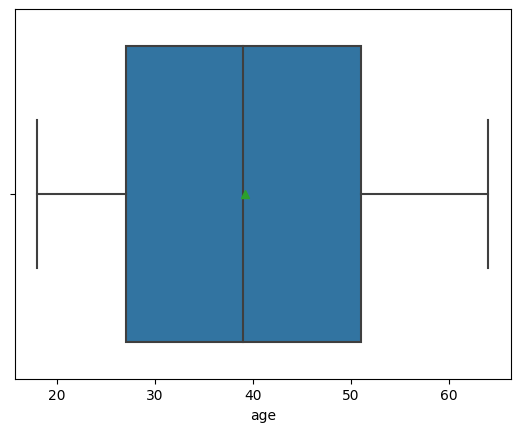

In [10]:
#Boxplot
sns.boxplot(x = df['age'] , showmeans = True);

 Podemos perceber que a média está bem proxima a mediana, isso sugere que a distribuição dos dados é razoavelmente simétrica.

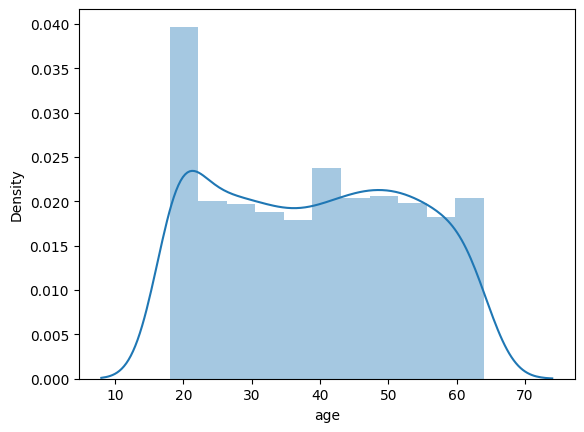

In [11]:
#Histograma
sns.distplot(df['age']);

A maior concentração está nos 20 e depois em dos 40 para o 50.

In [12]:
#Estatisitca Descritiva

df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Analisando a idade no conjunto de dados percebemos que temos:

<ul>
  <li>A distribuição de idade parece ser razoavelmente simétrica, com 25% das pessoas tendo menos de 27 anos e 25% das pessoas tendo mais de 51 anos.</li>
  <li>O desvio padrão de idade é de cerca de 14 anos, o que indica que há uma grande variabilidade na idade das pessoas no conjunto de dados.</li>
</ul>

Para melhorar a performance e a rapidez na compreensão da nossa base de dados, vamos plotar os últimos dois gráficos e informações de cada coluna numérica menos a 'age'.

## Grid dos Gráficos



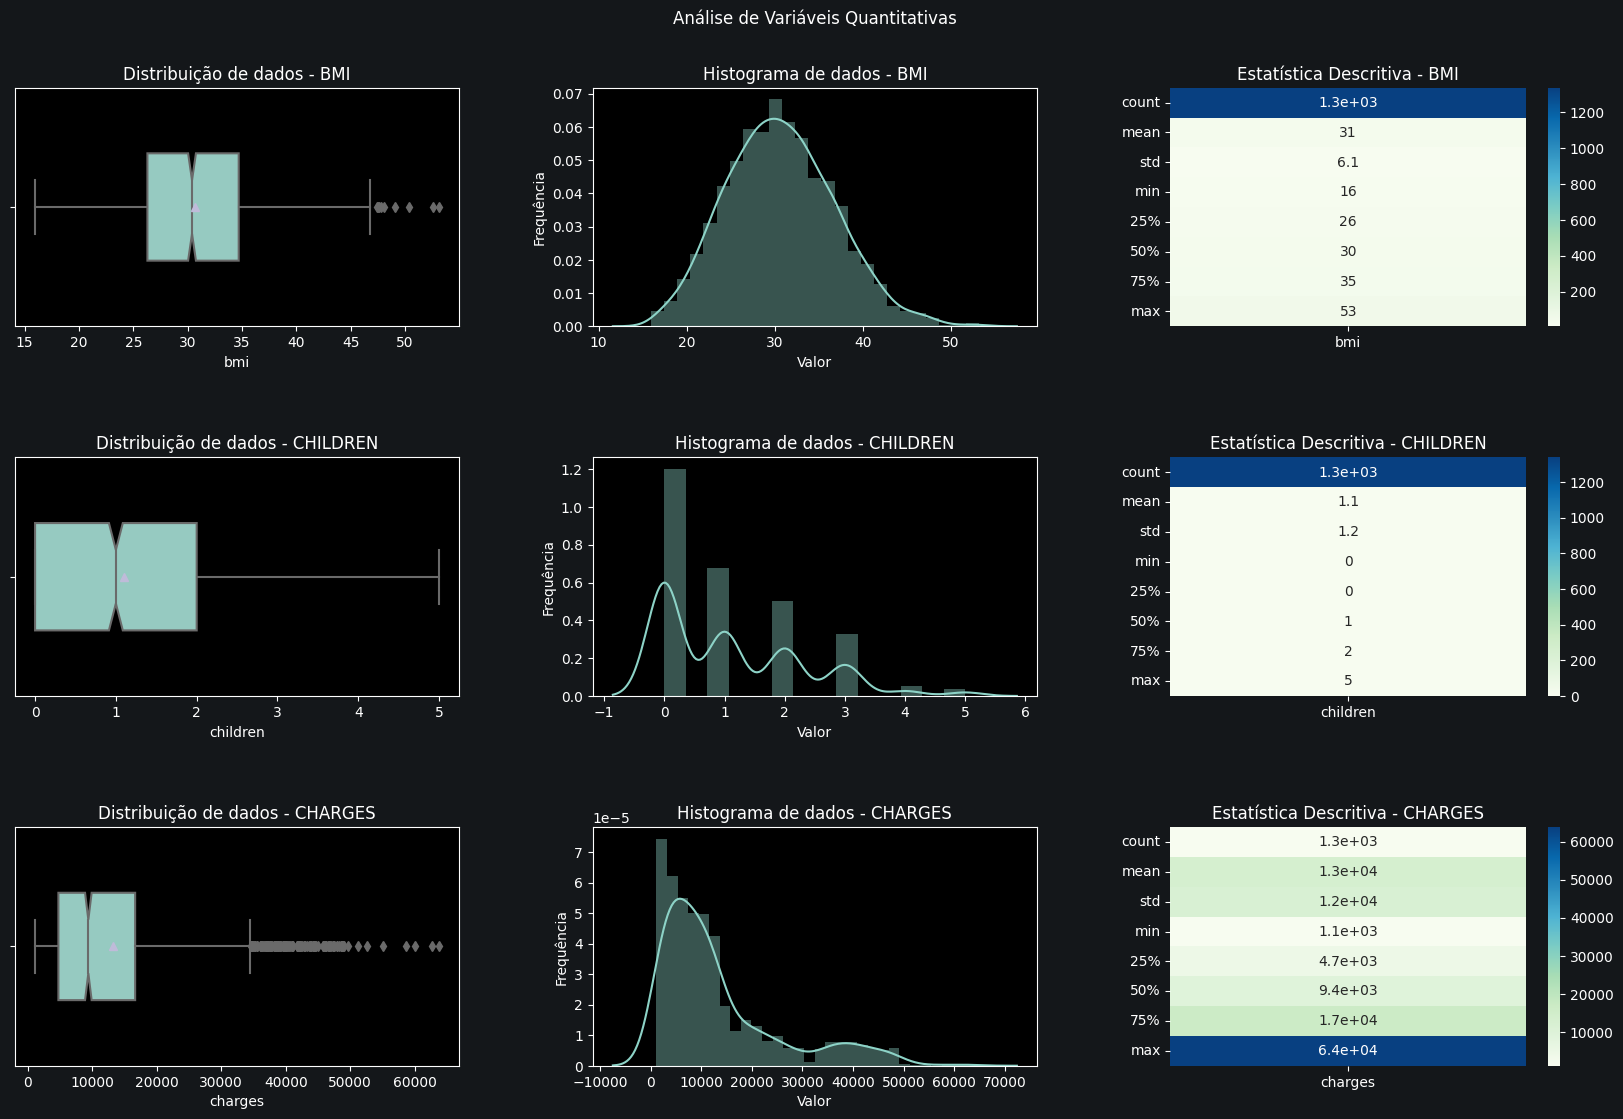

In [17]:
#Grid
quantidade_grafico = 3
colunas = 3
repeticao = 1

#ajustando o relatorio
Figura = plt.figure(figsize=(20,12))
Cor_Fundo = "#14171a"
Figura.set_facecolor(Cor_Fundo)

#Estilo
plt.style.use('dark_background')

#Titulo Principal
plt.suptitle('Análise de Variáveis Quantitativas')

#loop
for index, coluna in zip(df.dtypes.index , df.dtypes.values):

  #Apenas se for numerico e tirando o age
  if coluna != object and index != 'age':

    # Boxplot
    plt.subplot(quantidade_grafico, colunas, repeticao )
    plt.title(f'Distribuição de dados - {index.upper()}')
    sns.boxplot( x=df[index], width=0.45, notch=True, showmeans=True )
    repeticao += 1

    # Distplot
    plt.subplot( quantidade_grafico, colunas, repeticao )
    sns.distplot( df[index] )
    plt.title(f'Histograma de dados - {index.upper()}')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    repeticao += 1

    # Estatística
    plt.subplot( quantidade_grafico, colunas, repeticao )
    plt.title(f'Estatística Descritiva - {index.upper()}')
    sns.heatmap( pd.DataFrame( df[index].describe() ), annot=True, cmap="GnBu" )
    repeticao += 1
    
plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.3, hspace=0.55 );


Temos agora um painel de graficos para analise, vamos agora dar uma olhada nas colunas categoóricas.

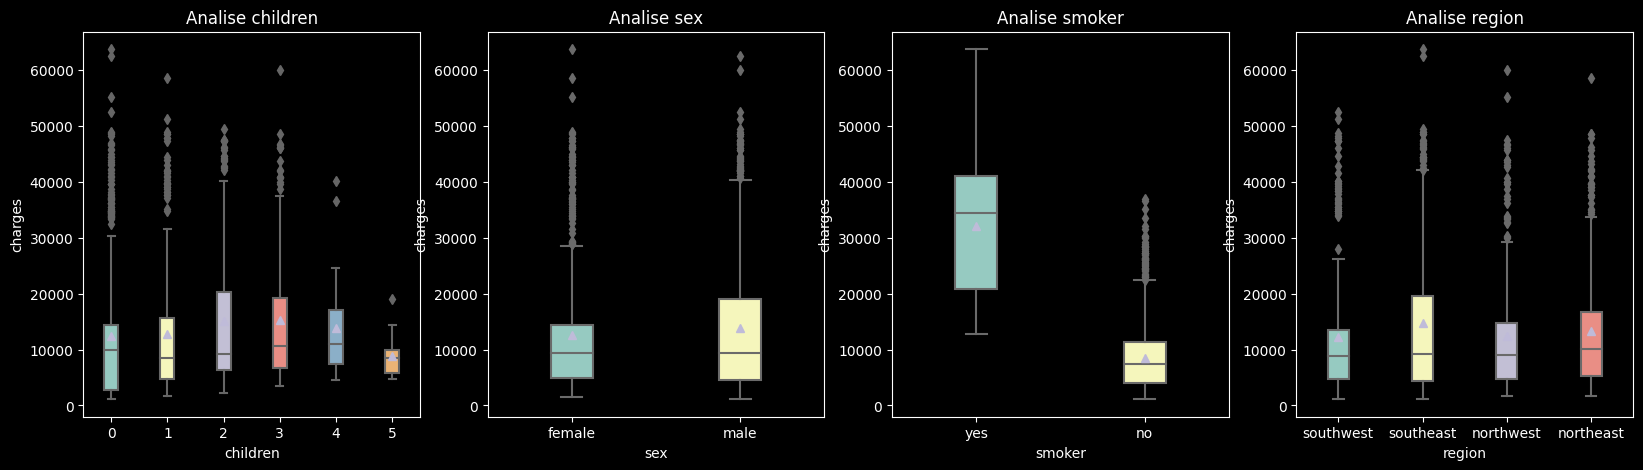

In [14]:
#dados categoricos
df_categorico = df[['children','sex', 'smoker', 'region','charges']]

figura = plt.figure(figsize=(20,5))

for repeticao , coluna in enumerate(df_categorico.columns[0:4]): 
    plt.subplot(1, 4, repeticao+1 ) 
    plt.title(f'Analise {coluna}')
    sns.boxplot(data = df_categorico, y='charges', x= coluna, width = 0.25, showmeans = True)

#ajuste
plt.subplots_adjust()   

Podemos concluir os homens gastam mais e quem fuma gasta mais tambem.

Sobre os estados não tem muita diferença.

## Machine Learning - Regressão

Vamos agora preparar e construir o modelo para prever o gasto de acordo com as características das pessoas.

### Preparação dos Dados

Vamos transformar as colunas categóricas para numéricas para compor no nosso modelo.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Instanciar 
le_Sex = LabelEncoder()
le_Smoker = LabelEncoder()
le_Region = LabelEncoder()

# Fitar (Treinar)
le_Sex.fit( df.sex.drop_duplicates() ) 
le_Smoker.fit( df.smoker.drop_duplicates() ) 
le_Region.fit( df.region.drop_duplicates() ) 

# Transformar
df.sex = le_Sex.transform( df.sex )
df.smoker = le_Smoker.transform( df.smoker )
df.region = le_Region.transform( df.region )

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Vamos ver a nossa transformação.

In [22]:
le_Sex.classes_, le_Smoker.classes_, le_Region.classes_

(array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object))

### Correlação

In [23]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


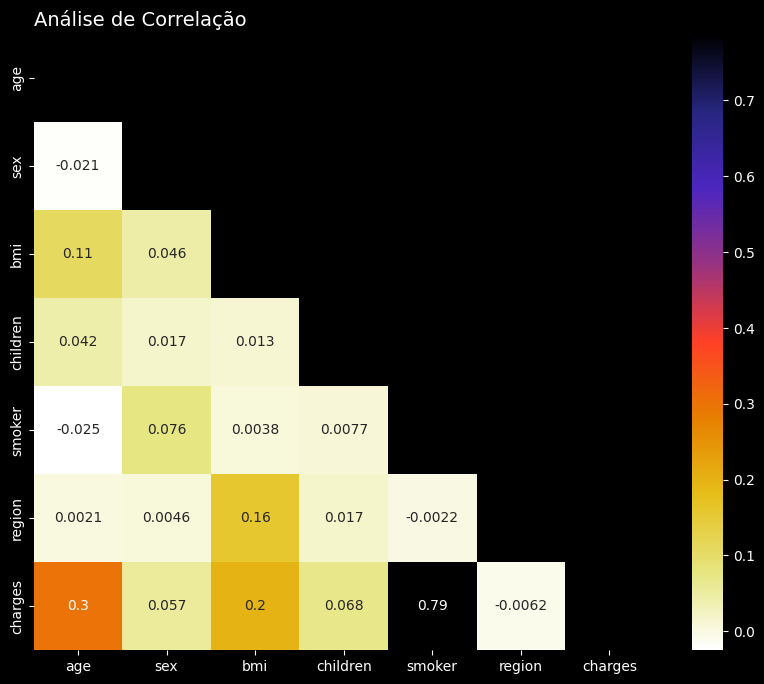

In [24]:
# Plot
Figura, Eixo = plt.subplots( figsize=(10, 8) )

# Calculando Coor
correlacao = df.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( correlacao )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação', loc='left', fontsize=14)

# Plot
sns.heatmap(
    correlacao, 
    mask=mask, 
    cmap='CMRmap_r',
    annot=True,
    );

Vemos a correlação entre as colunas, vemos que maior a idade maior o gasto do plano, pois tem uma correlação moderada positiva.

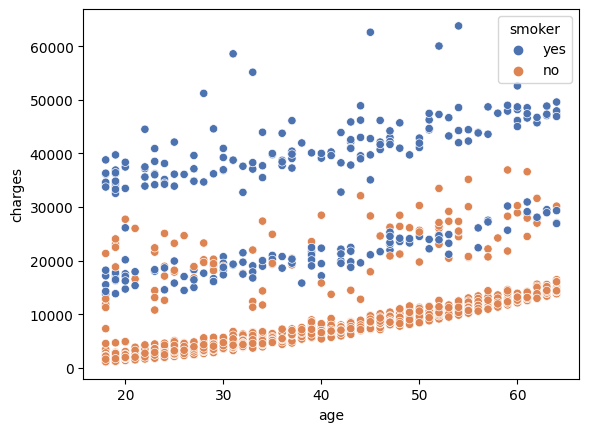

In [ ]:
sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    hue='smoker',
    palette="deep"
);

Vemos nitidamente que quem fuma gasta mais, é uma característica importante para o nosso modelo.

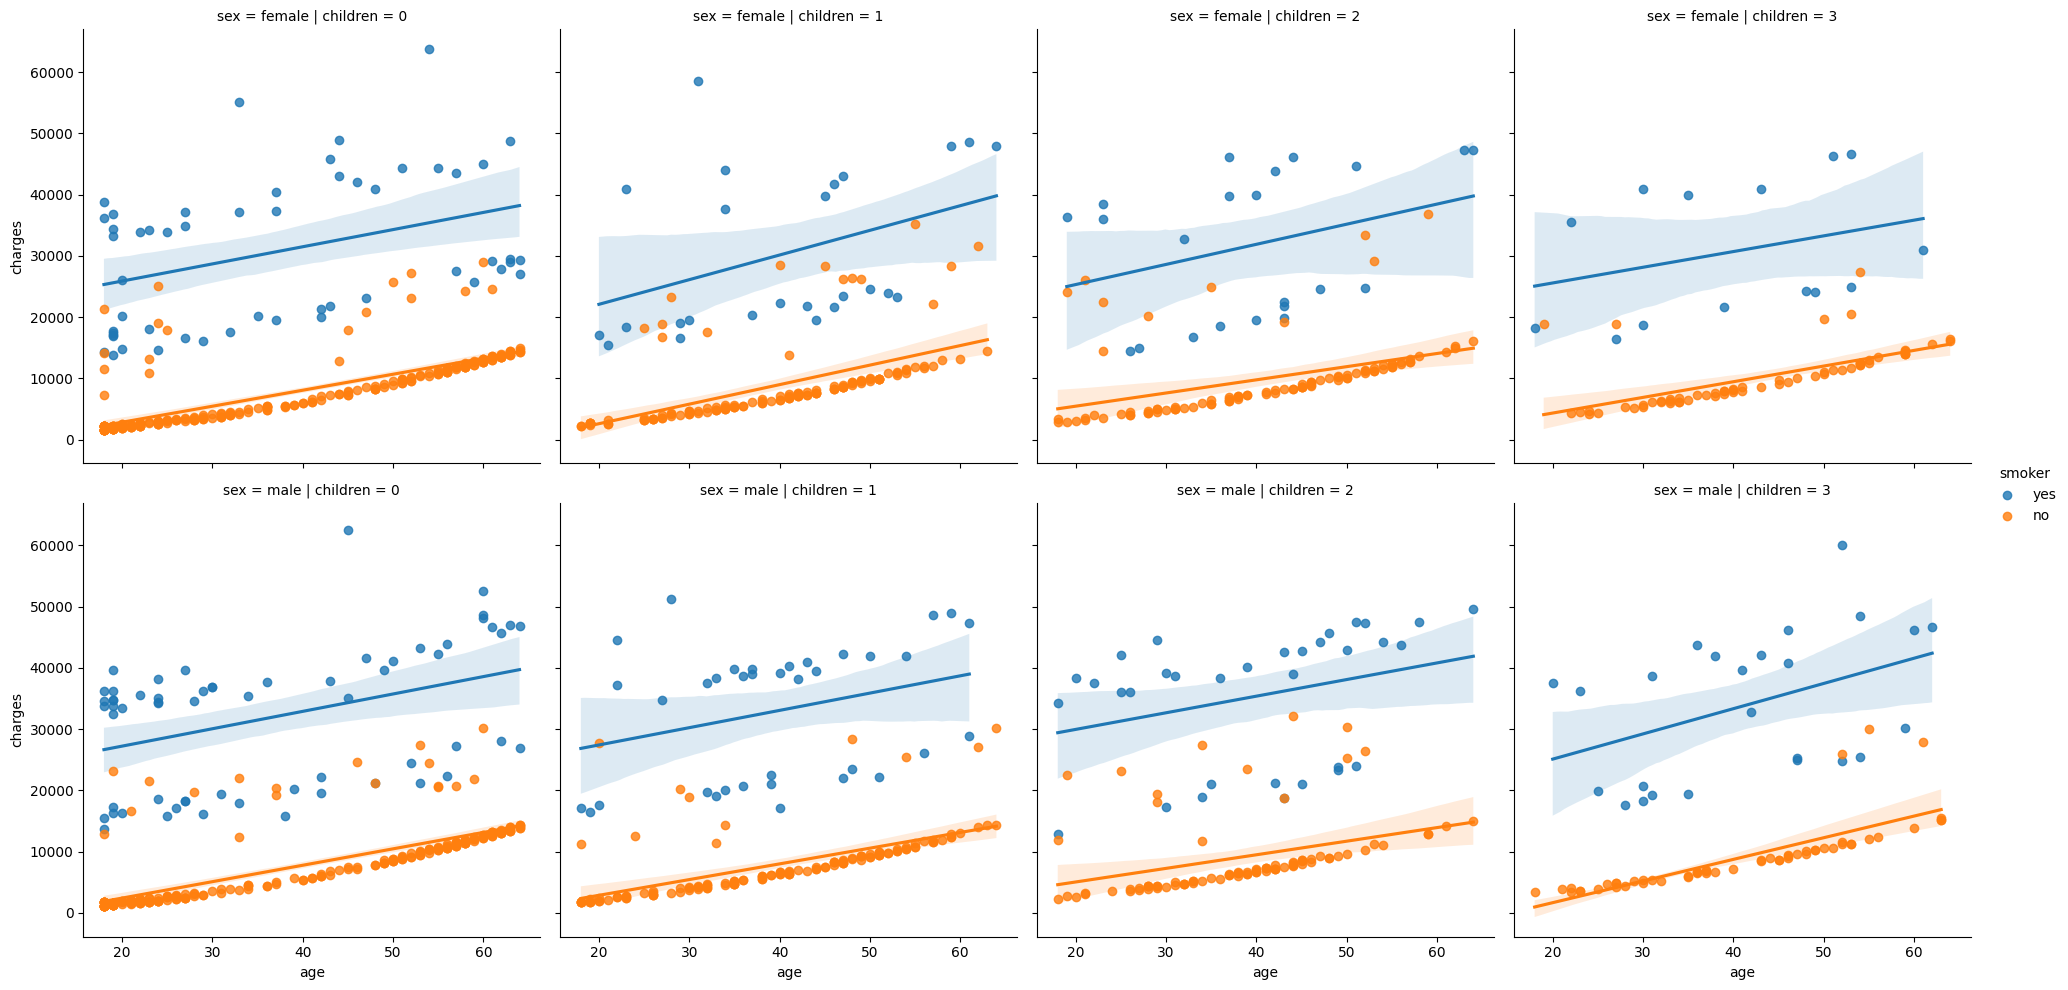

In [ ]:
sns.lmplot(
  data=df.loc[ df.children <= 3 ] ,
    x='age',
    y='charges',
    hue='smoker',
    row='sex',
    col='children'
);

### Teste de Shapiro

O teste de Shapiro-Wilk é um teste estatístico utilizado para verificar se uma dada amostra de dados segue uma distribuição normal. Ele é amplamente utilizado em análise de dados para avaliar se uma variável contínua pode ser modelada com uma distribuição normal.

Em resumo, o uso do Rank1D com o teste de Shapiro-Wilk é uma técnica comum para avaliar se uma variável pode ser modelada com uma distribuição normal e, portanto, pode ajudar a tomar decisões informadas sobre qual técnica estatística ou modelo utilizar para análise de dados.

In [ ]:
# Separar os dados em Eixo_X e Eixo_Y
Eixo_x = df.drop( columns=['charges'] )
#Eixo_x = df_categorico[['age', 'bmi', 'smoker']]
Eixo_y = df['charges']

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


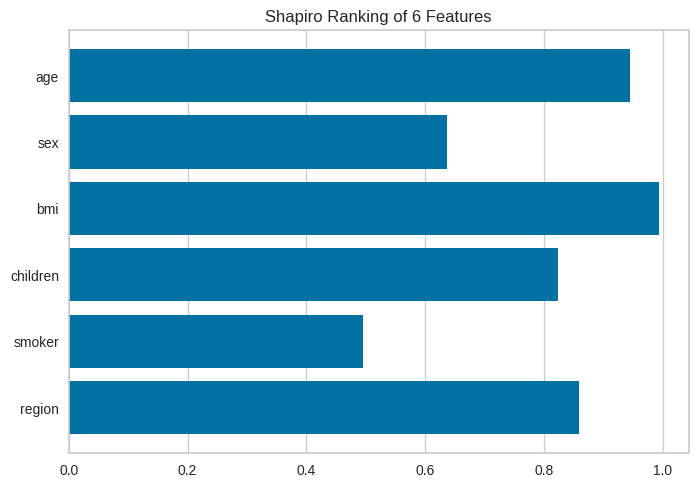

In [ ]:
# Teste estatístico
from yellowbrick.features import Rank1D

# Instanciar
Viz_Shapiro = Rank1D( algorithm='shapiro' )

# Fitar (Treinar)
Viz_Shapiro.fit( Eixo_x, Eixo_y ) 
Viz_Shapiro.transform(Eixo_x)

# Visualizar
Viz_Shapiro.show();

Vemos que temos uma fluência grande no 'age' e 'bmi'.

### Constuir Modelo

In [ ]:
# Divisão dos Dados
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( 
    Eixo_x, Eixo_y, 
    test_size=0.2, 
    random_state = 0 )

len( x_train ), len( x_test )

(1070, 268)

Vamos treinar 1070 registros e testar com 268 amostras.

In [ ]:
from sklearn.linear_model import LinearRegression

# Treino do modelo preditivo
Modelo_Linear = LinearRegression()
Modelo_Linear.fit( x_train, y_train )

# Variáveis de caracteristicas
Modelo_Linear.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

In [ ]:
# Previsoes para testar nossa modelo preditivo
Previsoes = Modelo_Linear.predict( x_test )

In [ ]:
Previsoes[0:5]

array([11017.23047857,  9787.53016777, 37994.78211844, 16122.77840727,
        6930.7592301 ])

### Métricas de avaliação de modelo de regressão


<ul>
  <li><strong>R²:</strong> Coeficiente de determinação que indica o quanto a variância da variável dependente (y) é explicada pelas variáveis independentes (x) incluídas no modelo. O valor varia de 0 a 1, sendo que quanto mais próximo de 1, melhor é o modelo.</li>
  <li><strong>MAE:</strong> Erro absoluto médio que mede a diferença média absoluta entre as previsões e os valores reais. É uma métrica de erro que pode ser facilmente interpretada em unidades originais dos dados.</li>
  <li><strong>MSE:</strong> Erro médio quadrático que mede a média dos erros ao quadrado entre as previsões e os valores reais. É uma métrica de erro que penaliza mais as grandes diferenças entre previsões e valores reais.</li>
  <li><strong>RMSE:</strong> Raiz quadrada do erro médio quadrático, que retorna a mesma unidade da variável dependente. É uma métrica de erro muito utilizada para avaliar modelos de regressão.</li>
  <li><strong>MAPE:</strong> Erro percentual absoluto médio que mede a diferença média percentual entre as previsões e os valores reais. É uma métrica de erro muito utilizada em previsões de séries temporais e que permite avaliar o desempenho do modelo em termos de porcentagem de erro.</li>
</ul>

**Quais parametros passar no 'scoring'**
<br> <br>
'r2': Coeficiente de determinação R²
<br>
'neg_mean_absolute_error': Erro absoluto médio negativo (MAE)
<br>
'neg_mean_squared_error': Erro quadrático médio negativo (MSE)
<br>
'neg_mean_squared_log_error': Erro quadrático médio do log negativo (MSLE)
<br>
'neg_median_absolute_error': Erro absoluto mediano negativo (MedAE)

In [ ]:
# Avaliar todas as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

R2 = Modelo_Linear.score( x_test, y_test )
MAE = mean_absolute_error( y_test, Previsoes )
MSE = mean_squared_error( y_test, Previsoes )
RMSE = mean_squared_error( y_test, Previsoes, squared=False )
MAPE = mean_absolute_percentage_error(y_test, Previsoes) * 100

Dicionario = {
    'R²' : round( R2, 2 ),
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round(MAPE, 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
R²,0.80
MAE,3930.33
MSE,31845929.13
RMSE,5643.22
MAPE,39.80


In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### Validação Cruzada

A validação cruzada (cross-validation, em inglês) é uma técnica utilizada para avaliar a performance de modelos de machine learning. Essa técnica consiste em dividir o conjunto de dados em k partes, treinar o modelo em k-1 partes e testar o modelo na parte restante. Esse processo é repetido k vezes, de forma que cada parte seja usada uma vez como conjunto de testes. Ao final, as métricas de avaliação (como R², MAE, MSE, RMSE, MAPE, entre outras) são calculadas como média das k execuções.

In [ ]:
# Função validação cruzada
from sklearn.model_selection import cross_val_score

# Instanciar um modelo de Regressão
model = LinearRegression()

# Rodar em partes
Scores = cross_val_score(
    
    # Algoritmo de Machine Learing
    model, 

    # Dados
    Eixo_x, 
    Eixo_y, 

    # numero de folds - 5 dobras
    cv=5,

    # Métrica de avaliação
    scoring='r2'
)

print(f'Avaliando a validação cruzada')
print( '--' * 25 )

print( f'Cada parte será testada com: {len(df) / 5} registros' )
print( '--' * 25 )

print( 'R² em cada dobra:', Scores )
print( '--' * 25 )

print(f'Média final: { round( np.mean(Scores), 2 ) }')

Avaliando a validação cruzada
--------------------------------------------------
Cada parte será testada com: 267.6 registros
--------------------------------------------------
R² em cada dobra: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
--------------------------------------------------
Média final: 0.75


In [ ]:
# Lendo a Base
novo_contrato = pd.read_csv('Base_Dados_Plano_Saude - Novo Contrato.csv', sep=';')
novo_contrato.shape

(50, 6)

In [ ]:
# Verificando
novo_contrato.head()

,age,sex,bmi,children,smoker,region
0,31,female,2574,0,no,southeast
1,25,male,2622,0,no,northeast
2,23,male,23845,0,no,northeast
3,30,male,353,0,yes,southwest
4,59,female,2772,3,no,southeast


In [ ]:
# Transformar os dados

novo_contrato.sex = le_Sex.transform( novo_contrato.sex )
novo_contrato.smoker = le_Smoker.transform( novo_contrato.smoker )
novo_contrato.region = le_Region.transform( novo_contrato.region )

novo_contrato.head()

,age,sex,bmi,children,smoker,region
0,31,0,2574,0,0,2
1,25,1,2622,0,0,0
2,23,1,23845,0,0,0
3,30,1,353,0,1,3
4,59,0,2772,3,0,2


### Predição

In [ ]:
# Fazendo o predict
novo_contrato['Custo_Plano'] =  Modelo_Linear.predict( novo_contrato )

novo_contrato.head()

,age,sex,bmi,children,smoker,region,Custo_Plano
0,31,0,2574,0,0,2,8.409431e+05
1,25,1,2622,0,0,0,8.557351e+05
2,23,1,23845,0,0,0,7.824916e+06
3,30,1,353,0,1,3,1.345629e+05
4,59,0,2772,3,0,2,9.144098e+05


In [ ]:
novo_contrato['Custo_Plano'].values

array([  840943.08254541,   855735.14964116,  7824915.90665624,
         134562.92468276,   914409.76046738,   713854.96947991,
        1098688.79600228,  1151139.47091873,   899076.08921021,
        8512726.88073505,  8640543.45287568,    92000.83128996,
        1356020.02353375,  1010735.19939741,    99865.07809956,
         936696.28336115,   108805.15566646,   119718.05664906,
       10039246.68115048,    97463.8605631 ,   109641.1409286 ,
         111090.04522258,  1122998.73809097,   997434.63358562,
         107906.00928528,   874660.64648181,  1222888.56333336,
        1064681.06113124,   898286.06881851,  1252454.11533702,
          86932.67543925,  1514088.32662656,    85782.44050951,
         120800.77432725,   121179.50259074,    79948.33945989,
         109966.79300726, 10513898.06651555,   696144.12978337,
        1335937.86561691,  1037082.53164306, 10327569.32150892,
         112695.82816502,    77356.85434719,   982501.20183795,
          74504.8340754 ,  1169553.30490

## Conclusão



Analisando o nosso modelo preditivo, identificamos que existe uma chance de 40% de ocorrer erro na previsão dos valores para novos clientes. Essa acurácia não é considerada ideal, mas podemos aprimorar o modelo utilizando outras técnicas de machine learning e adicionando mais características dos clientes para aprimorar a precisão das previsões.

Apesar disso, ainda assim foi possível desenvolver um modelo de previsão para novos clientes, o que pode fornecer informações importantes para a equipe de vendas e operações sobre os custos envolvidos em novos contratos.